## Import Packages

In [21]:
# Import packages
%matplotlib inline

import pandas as pd
import lightkurve as lk
import deep_transit as dt
import joblib

from sklearnex import patch_sklearn
patch_sklearn() #parche de rendimiento de scikit learn



# Visualizes all the columns
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## Examining Data

In [22]:
loaded_model = joblib.load('models/grid_model.sav') # se carga el modelo de machine learning
model_path = 'models/model_Kepler.pth' #se carga el modelo de deep learning

In [23]:
df = pd.read_excel('excel/output.xlsx', usecols="B:BD") 
df = df[df.ExoplanetConfirmed != 1]
df = df[df.ExoplanetCandidate != 0]
df = df.drop(columns=['ExoplanetCandidate','ExoplanetConfirmed'])
df.describe() #se recupera la tabla original pero solo con los elementos que son candidatos, se eliminan todos los confirmados, y falsos positivos


ra          dec     koi_gmag     koi_rmag     koi_imag  \
count  1152.000000  1152.000000  1152.000000  1152.000000  1152.000000   
mean    291.806579    43.924647    15.111448    14.495171    14.296045   
std       4.776638     3.667358     1.300124     1.183140     1.145339   
min     280.360230    36.771042     7.628000     7.789000     7.935000   
25%     288.126900    40.995708    14.307500    13.780000    13.629250   
50%     292.126145    43.791895    15.342500    14.750500    14.563000   
75%     295.712213    46.760339    16.060000    15.391750    15.166000   
max     301.562840    52.220341    18.273000    17.244000    16.851000   

          koi_zmag     koi_jmag     koi_hmag     koi_kmag   koi_kepmag  \
count  1152.000000  1152.000000  1152.000000  1152.000000  1152.000000   
mean     14.193964    13.253392    12.876672    12.802890    14.541611   
std       1.128858     1.117305     1.097216     1.101961     1.182416   
min       6.702000     4.097000     3.014000     2.311000     7.748000   
25%      13.559250    12.674500    12.338000    12.271250    13.819500   
50%      14.459500    13.504500    13.113000    13.032500    14.810500   
75%      15.034000    14.056250    13.664250    13.593000    15.444500   
max      16.686000    15.705000    15.197000    15.065000    17.195000   

         koi_count  koi_num_transits  koi_max_sngle_ev  koi_max_mult_ev  \
count  1152.000000       1152.000000       1152.000000      1152.000000   
mean      1.260417        240.196181         11.132978        45.196748   
std       0.632095        406.701257         30.994347       180.149015   
min       1.000000          0.000000          2.417437         7.105690   
25%       1.000000         24.000000          3.388921         8.216843   
50%       1.000000         95.000000          3.984138         9.660881   
75%       1.000000        239.000000          5.541389        14.142254   
max       7.000000       2642.000000        387.826840      2769.753200   

       koi_bin_oedp_sig  koi_model_snr  koi_time0bk  koi_eccen     koi_prad  \
count       1152.000000    1152.000000  1152.000000     1152.0  1152.000000   
mean           0.530519      40.291927   165.438300        0.0     5.212656   
std            0.336280     115.230910    67.133760        0.0    13.950464   
min           -1.000000       0.000000   131.484850        0.0     0.350000   
25%            0.270525       9.800000   133.385877        0.0     1.140000   
50%            0.572800      11.850000   137.701605        0.0     1.700000   
75%            0.816050      17.800000   160.065725        0.0     3.140000   
max            1.000000    1441.900000   581.880600        0.0   231.850000   

           koi_sma   koi_impact  koi_duration     koi_depth   koi_period  \
count  1152.000000  1152.000000   1152.000000   1152.000000  1152.000000   
mean      0.226079     0.467703      4.761323   1533.586979    58.428686   
std       0.289938     0.364065      4.241059   5377.993570   109.337139   
min       0.006500     0.000000      0.052000      0.000000     0.259820   
25%       0.055200     0.134500      2.061000    114.675000     4.878551   
50%       0.102200     0.396000      3.447500    237.200000    11.858404   
75%       0.249200     0.777250      5.802000    558.225000    45.067004   
max       1.698800     1.692000     35.512000  59099.400000   809.014188   

           koi_ror      koi_dor     koi_incl      koi_teq    koi_steff  \
count  1152.000000  1152.000000  1152.000000  1152.000000  1152.000000   
mean      0.037067    61.243205    87.010990   900.426215  5648.883681   
std       0.068477   109.297004     7.335171   586.701015   647.411644   
min       0.003623     1.069500    12.470000   144.000000  3287.000000   
25%       0.010169    10.461500    87.617500   507.750000  5334.000000   
50%       0.014822    21.925500    89.255000   794.000000  5715.000000   
75%       0.025182    59.050000    89.820000  1141.250000  6068.000000   
max       0.70871

In [24]:
result = loaded_model.predict(df)# se ocupa el modelo de machine learning para predecir entre los candidatos, cuales serian candidatos a ser confirmados
print(result)
index = pd.read_excel('excel/output.xlsx', usecols="A, BC:BD", index_col= None)
index  = index[index.ExoplanetConfirmed != 1]
index  = index[index.ExoplanetCandidate != 0]
index = index.drop(columns=['ExoplanetCandidate','ExoplanetConfirmed'])# se obtiene la tabla de candidatos pero solo con la columna de referencia de su posicion para poder relacionarlo con su kepid
index = index.transpose() #se transpone la lista de indices con kepid
list_index = index.values.tolist() #se convierte a una lista de python
df2 = pd.DataFrame({'candidate':result}, index = list_index) #se relaciona las ubicaciones de los elementos en el dataframe con su respectivo kepid para poder identificarlos y buscarlos en lightkurve
print(df2)

[0 0 0 ... 0 0 0]
      candidate
2             0
37            0
58            0
62            0
63            0
...         ...
9536          0
9542          0
9552          0
9560          0
9562          0

[1152 rows x 1 columns]


In [25]:
df2_cand = df2[df2["candidate"] == 1] #se selecciona solo los que el machine learning predice que podrian ser confirmados
lista_candidatos = df2_cand.index.values.tolist() #lo convierte en lista
lista_candidatos = [i[0] for i in lista_candidatos] #lo convierte en lista de pyton
print(lista_candidatos)
print(len(lista_candidatos))

[231, 269, 287, 316, 319, 363, 405, 486, 537, 716, 864, 971, 1010, 1065, 1078, 1117, 1136, 1143, 1182, 1201, 1204, 1210, 1326, 1365, 1421, 1496, 1535, 1549, 1581, 1646, 1693, 1741, 1743, 1776, 1811, 1824, 1826, 1827, 1832, 1884, 1969, 1988, 2012, 2019, 2053, 2054, 2055, 2117, 2118, 2127, 2130, 2150, 2179, 2202, 2213, 2219, 2244, 2286, 2288, 2298, 2299, 2347, 2366, 2367, 2384, 2392, 2430, 2443, 2472, 2485, 2554, 2573, 2595, 2620, 2641, 2662, 2702, 2769, 2773, 2789, 2796, 2833, 2851, 2867, 2906, 2917, 2928, 2934, 2938, 2939, 2992, 3015, 3027, 3178, 3388, 3434, 3665, 3719, 3762, 3767, 3773, 3807, 3823, 3826, 3842, 3845, 3846, 3940, 3951, 3967, 3997, 4007, 4010, 4021, 4041, 4049, 4088, 4095, 4176, 4177, 4190, 4197, 4275, 4283, 4338, 4365, 4443, 4462, 4680, 4698, 4708, 4904, 4959, 5012, 5027, 5030, 5058, 5085, 5121, 5123, 5151, 5240, 5361, 5684, 5747, 5765, 5976, 6354, 6542, 6657, 6702, 6873, 6945, 6976, 6990, 7069, 7124, 7212, 7247, 7277, 7370, 7388, 7412, 7510, 8578, 8665, 8791]
167


In [26]:
writer = pd.ExcelWriter('excel/output_ML.xlsx')
df2.to_excel(writer) #escribe el resultado completo del machine learning a un .xlsx
writer.save()

In [27]:
df_cumulative = pd.read_csv('excel/cumulative.csv')
df_cumulative_cand = df_cumulative.filter(items = lista_candidatos, axis=0)
kepids = df_cumulative_cand["kepid"].values #se relaciona las ubicaciones de los elementos en el dataframe con su respectivo kepid para poder identificarlos y buscarlos en lightkurve, dejando una lista solo de kepid de candidatos finales
candidatos_kic = kepids.tolist() #lo convierte a lista de python
print(candidatos_kic)

[8018547, 9140402, 8951215, 2860866, 10319385, 2307199, 2853446, 12105051, 8313667, 6441738, 9427402, 6719086, 10867062, 9636135, 7287683, 9017682, 5031857, 9729691, 4471747, 4830605, 12120943, 7768451, 7750419, 7887791, 11773328, 11570749, 3648437, 2449431, 4242147, 6300348, 6119141, 3097926, 5730445, 11462341, 9532710, 9580992, 6934986, 4049901, 10798331, 11520459, 11030475, 10471621, 4670217, 8894646, 8247770, 6867588, 7501646, 8636539, 9283156, 9574158, 7294743, 4047631, 7446631, 3002478, 4172746, 5095635, 3642741, 7984574, 10336951, 11622985, 11361283, 9815053, 12602314, 5787131, 4547603, 8259713, 4935172, 10604521, 10597693, 2985587, 7899070, 4846856, 4552729, 11071200, 11076400, 10749059, 8241079, 2973386, 9288237, 6593150, 8197793, 5475042, 8827575, 6438099, 7918652, 4676964, 11395587, 8509442, 3219643, 8546542, 8265218, 9119458, 10016874, 4951877, 7730747, 10272442, 3103212, 7733731, 9071593, 8264402, 7907808, 6140059, 9086154, 11970988, 3450040, 9456281, 5129453, 7661893, 111

In [28]:
def deep_transit(lc): #modelo de deeplearning
    dt_obj = dt.DeepTransit(lc, is_flat=False)
    bboxes = dt_obj.transit_detection(model_path, batch_size=2, confidence_threshold=0.6, nms_iou_threshold=0.1, device_str='auto', backend='pytorch')
    detrended_lc = dt.detrend_light_curve(lc)
    dt.plot_lc_with_bboxes(detrended_lc, bboxes, ms=3, marker='o')


In [29]:
def deep_transit_candidates(kepid): #objeto de lightkurve para analizar candidatos y luego llama al deep learning
    pixelFile = lk.search_targetpixelfile("KIC " + str(kepid), exptime='long').download()
    pixelFile.plot()
    lc = pixelFile.to_lightcurve(aperture_mask = pixelFile.pipeline_mask)
    lc.plot()
    flat_lc = lc.flatten()
    flat_lc.plot()
    deep_transit(lc)

c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\lightkurve\search.py:407: LightkurveWarning: Warning: 17 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.


Loading Model: models/model_Kepler.pth


c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\deep_transit\dt_lightcurve.py:317: UserWarning: The total number of progress bar is the upper limit.
100%|██████████| 4/4 [00:02<00:00,  1.60it/s]
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\lightkurve\search.py:407: LightkurveWarning: Warning: 17 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\deep_transit\dt_lightcurve.py:317: UserWarning: The total number of progress bar is the upper limit.


Loading Model: models/model_Kepler.pth


100%|██████████| 4/4 [00:02<00:00,  1.58it/s]
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\lightkurve\search.py:407: LightkurveWarning: Warning: 17 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\deep_transit\dt_lightcurve.py:317: UserWarning: The total number of progress bar is the upper limit.


Loading Model: models/model_Kepler.pth


100%|██████████| 4/4 [00:02<00:00,  1.47it/s]
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\lightkurve\search.py:407: LightkurveWarning: Warning: 14 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\deep_transit\dt_lightcurve.py:317: UserWarning: The total number of progress bar is the upper limit.


Loading Model: models/model_Kepler.pth


100%|██████████| 8/8 [00:05<00:00,  1.54it/s]
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\lightkurve\search.py:407: LightkurveWarning: Warning: 18 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\deep_transit\dt_lightcurve.py:317: UserWarning: The total number of progress bar is the upper limit.


Loading Model: models/model_Kepler.pth


 50%|█████     | 1/2 [00:00<00:00,  2.06it/s]
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\lightkurve\search.py:407: LightkurveWarning: Warning: 17 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\lightkurve\utils.py:491: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\deep_transit\dt_lightcurve.py:317: UserWarning: The total number of progress bar is the upper limit.


Loading Model: models/model_Kepler.pth


100%|██████████| 4/4 [00:02<00:00,  1.59it/s]
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\lightkurve\search.py:407: LightkurveWarning: Warning: 17 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.


Loading Model: models/model_Kepler.pth


c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\deep_transit\dt_lightcurve.py:317: UserWarning: The total number of progress bar is the upper limit.
100%|██████████| 4/4 [00:02<00:00,  1.59it/s]
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\lightkurve\search.py:407: LightkurveWarning: Warning: 17 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\deep_transit\dt_lightcurve.py:317: UserWarning: The total number of progress bar is the upper limit.


Loading Model: models/model_Kepler.pth


100%|██████████| 4/4 [00:02<00:00,  1.61it/s]
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\lightkurve\search.py:407: LightkurveWarning: Warning: 17 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\deep_transit\dt_lightcurve.py:317: UserWarning: The total number of progress bar is the upper limit.


Loading Model: models/model_Kepler.pth


100%|██████████| 4/4 [00:02<00:00,  1.55it/s]
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\lightkurve\search.py:407: LightkurveWarning: Warning: 17 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\deep_transit\dt_lightcurve.py:317: UserWarning: The total number of progress bar is the upper limit.


Loading Model: models/model_Kepler.pth


100%|██████████| 4/4 [00:02<00:00,  1.56it/s]
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\lightkurve\search.py:407: LightkurveWarning: Warning: 14 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.


Loading Model: models/model_Kepler.pth


c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\deep_transit\dt_lightcurve.py:317: UserWarning: The total number of progress bar is the upper limit.
100%|██████████| 8/8 [00:04<00:00,  1.60it/s]
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\lightkurve\search.py:407: LightkurveWarning: Warning: 14 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\deep_transit\dt_lightcurve.py:317: UserWarning: The total number of progress bar is the upper limit.


Loading Model: models/model_Kepler.pth


100%|██████████| 8/8 [00:05<00:00,  1.59it/s]
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\lightkurve\search.py:407: LightkurveWarning: Warning: 17 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\deep_transit\dt_lightcurve.py:317: UserWarning: The total number of progress bar is the upper limit.


Loading Model: models/model_Kepler.pth


100%|██████████| 4/4 [00:02<00:00,  1.40it/s]
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\lightkurve\search.py:407: LightkurveWarning: Warning: 17 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\deep_transit\dt_lightcurve.py:317: UserWarning: The total number of progress bar is the upper limit.


Loading Model: models/model_Kepler.pth


100%|██████████| 4/4 [00:02<00:00,  1.34it/s]
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\lightkurve\search.py:407: LightkurveWarning: Warning: 18 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\deep_transit\dt_lightcurve.py:317: UserWarning: The total number of progress bar is the upper limit.


Loading Model: models/model_Kepler.pth


 50%|█████     | 1/2 [00:00<00:00,  1.91it/s]
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\lightkurve\search.py:407: LightkurveWarning: Warning: 17 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\deep_transit\dt_lightcurve.py:317: UserWarning: The total number of progress bar is the upper limit.


Loading Model: models/model_Kepler.pth


100%|██████████| 4/4 [00:02<00:00,  1.53it/s]
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\lightkurve\search.py:407: LightkurveWarning: Warning: 17 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\deep_transit\dt_lightcurve.py:317: UserWarning: The total number of progress bar is the upper limit.


Loading Model: models/model_Kepler.pth


100%|██████████| 4/4 [00:02<00:00,  1.58it/s]
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\lightkurve\search.py:407: LightkurveWarning: Warning: 14 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\deep_transit\dt_lightcurve.py:317: UserWarning: The total number of progress bar is the upper limit.


Loading Model: models/model_Kepler.pth


100%|██████████| 4/4 [00:02<00:00,  1.57it/s]
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\lightkurve\search.py:407: LightkurveWarning: Warning: 14 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\deep_transit\dt_lightcurve.py:317: UserWarning: The total number of progress bar is the upper limit.


Loading Model: models/model_Kepler.pth


100%|██████████| 4/4 [00:02<00:00,  1.46it/s]
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\lightkurve\search.py:407: LightkurveWarning: Warning: 17 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
c:\Users\Dodo\AppData\Local\Programs\Python\Python310\lib\site-packages\deep_transit\dt_lightcurve.py:317: UserWarning: The total number of progress bar is the upper limit.


Loading Model: models/model_Kepler.pth


100%|██████████| 4/4 [00:02<00:00,  1.58it/s]


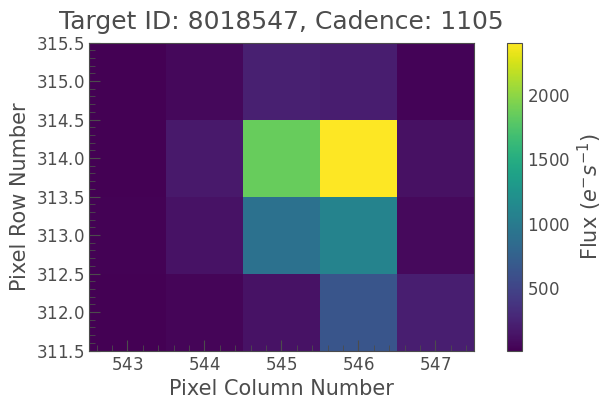

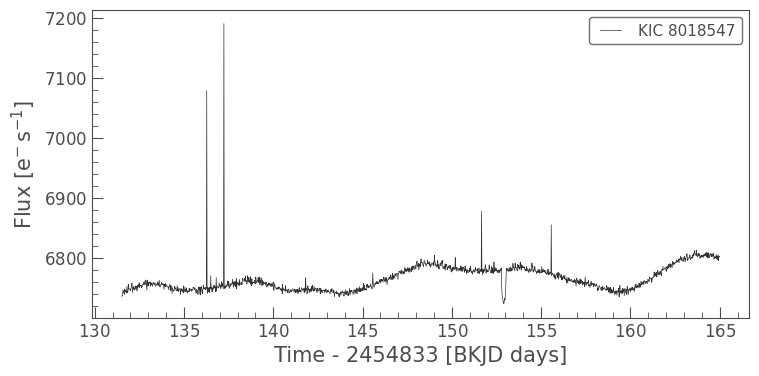

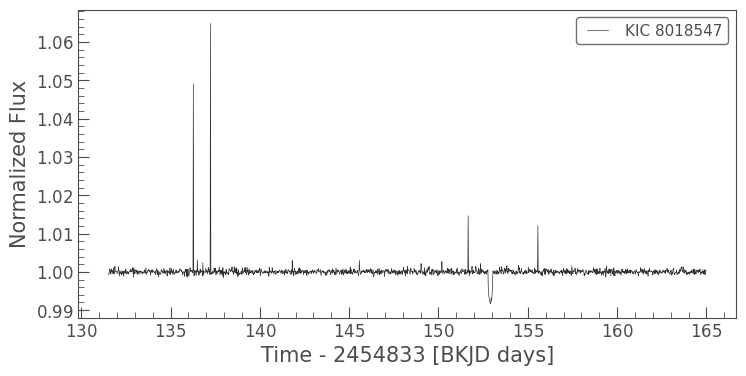

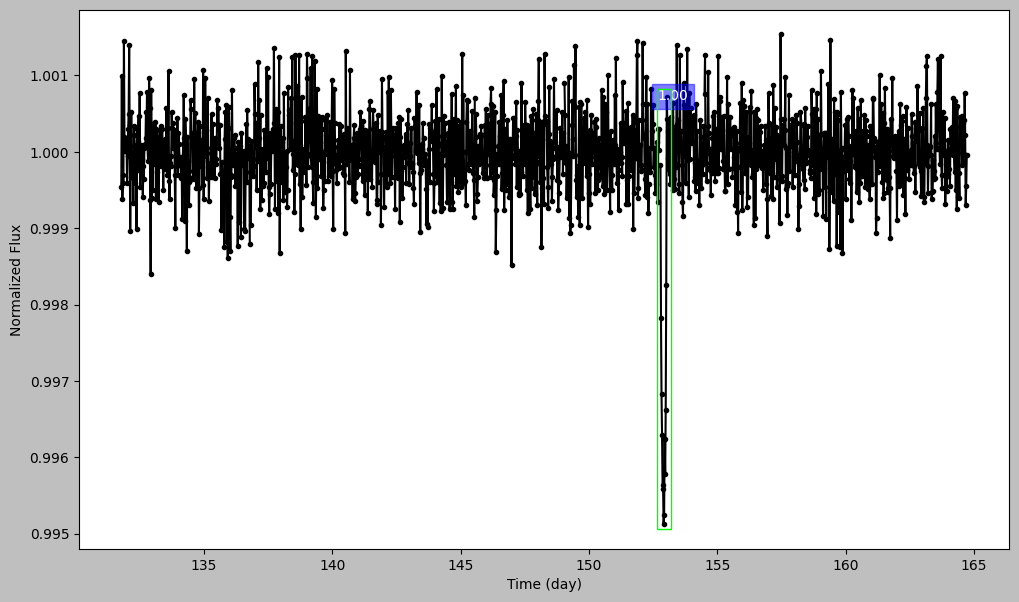

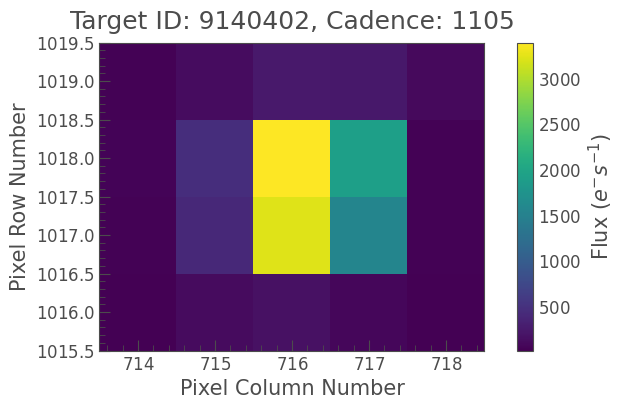

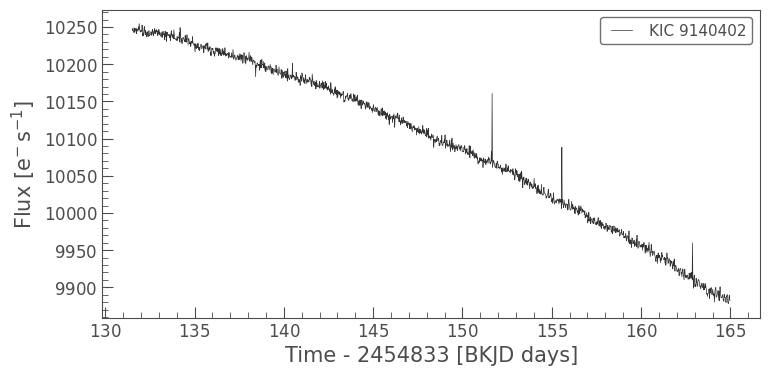

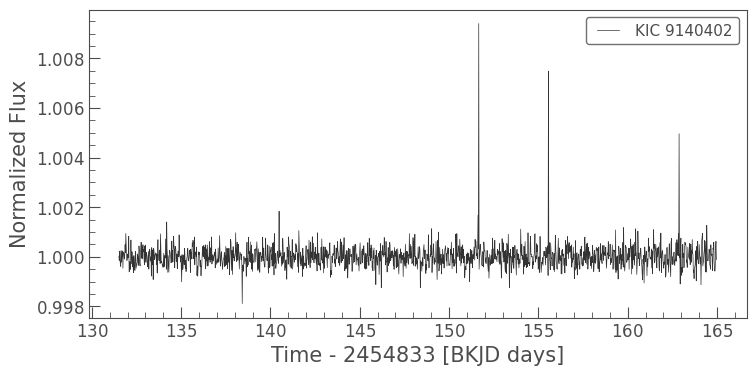

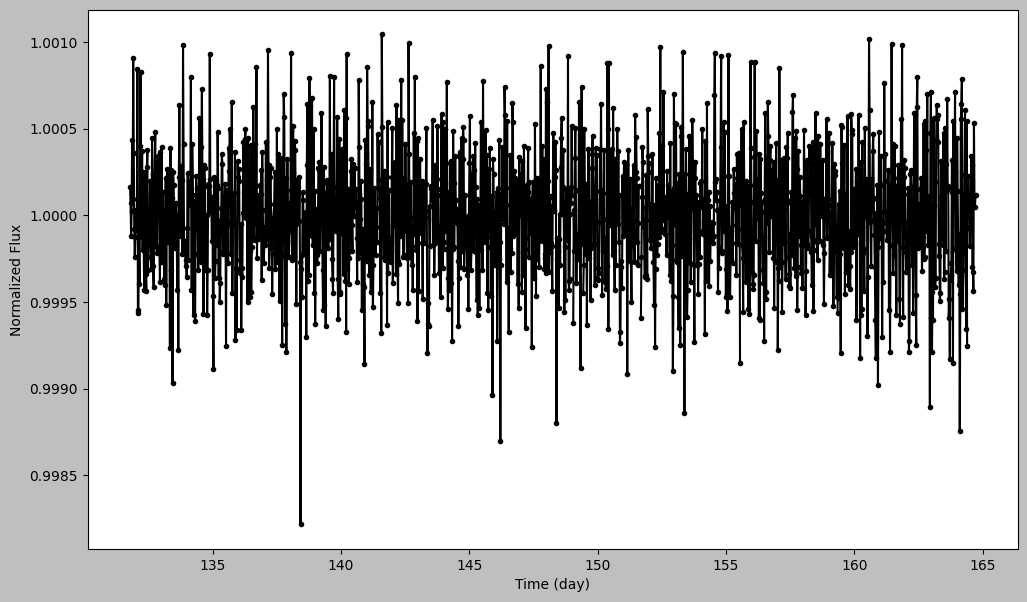

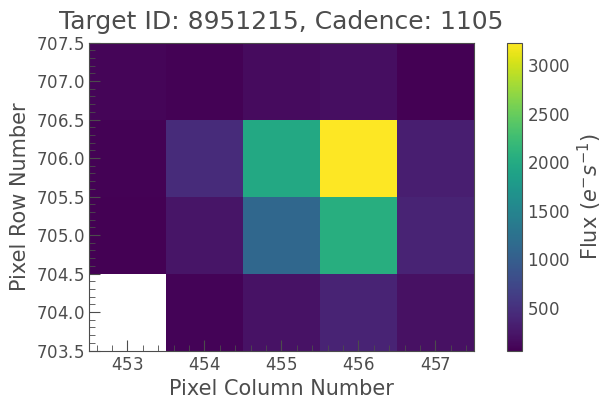

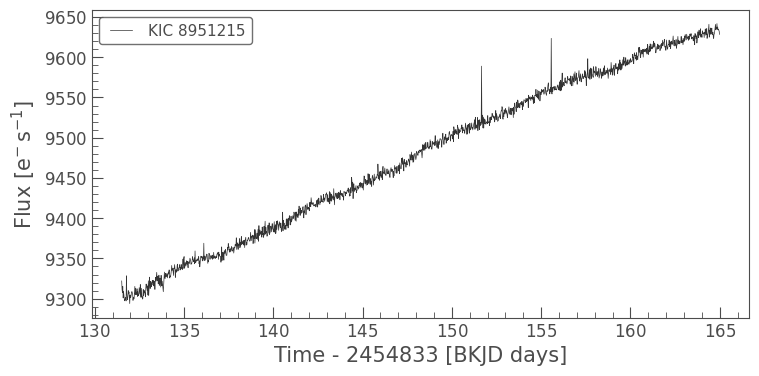

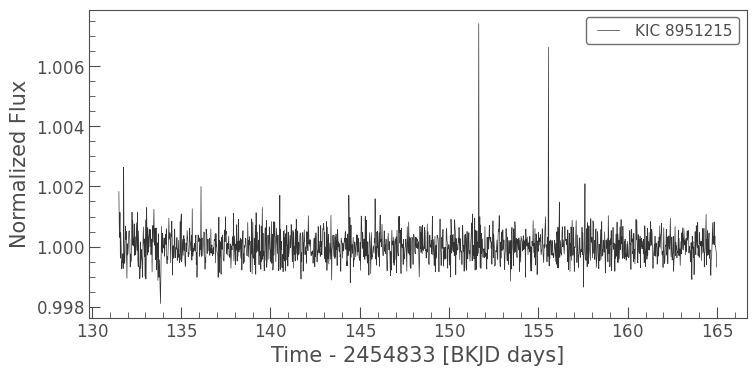

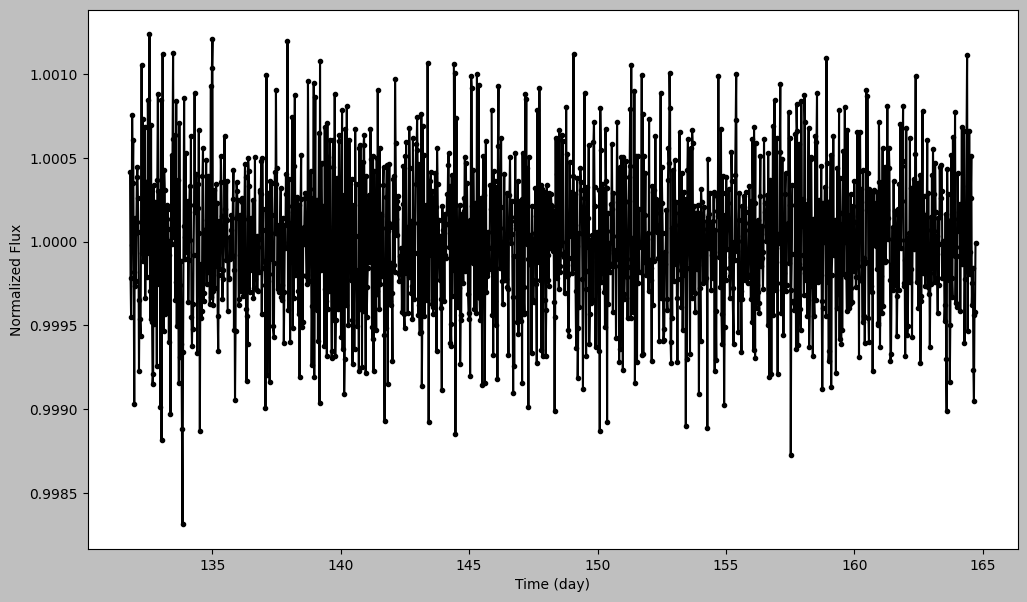

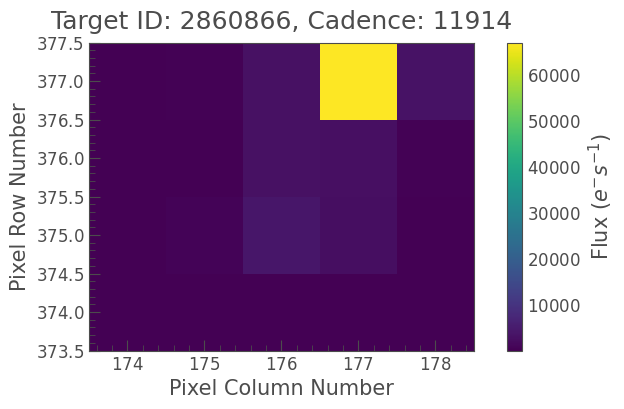

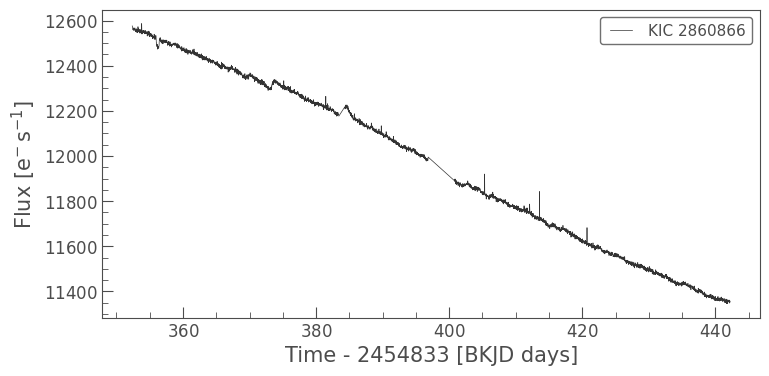

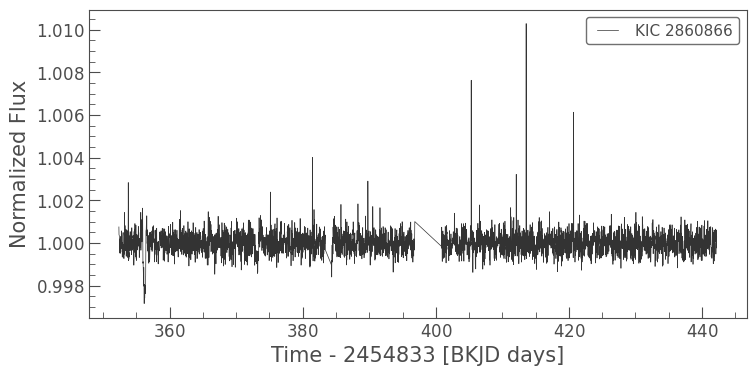

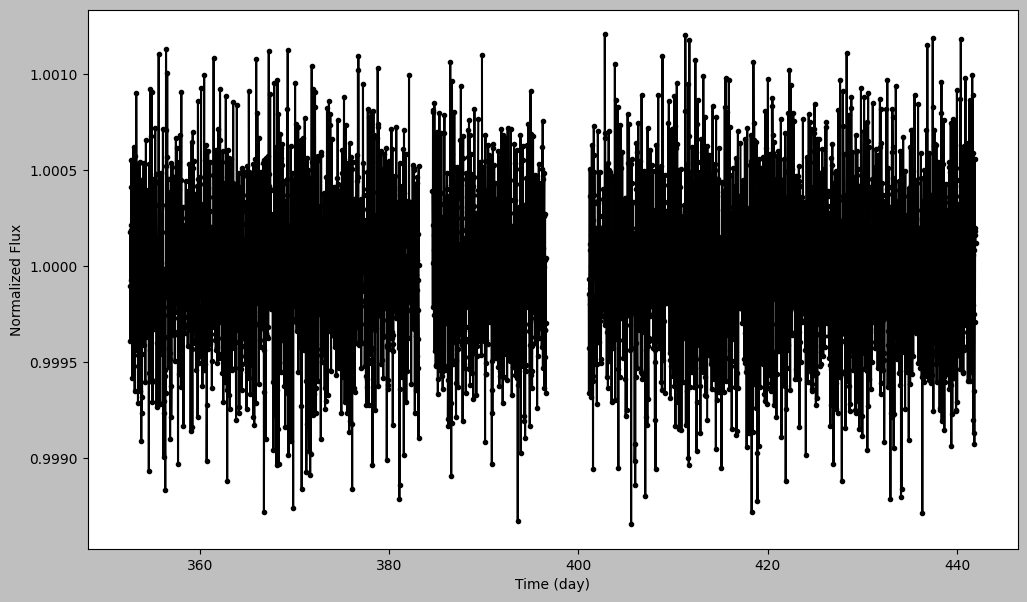

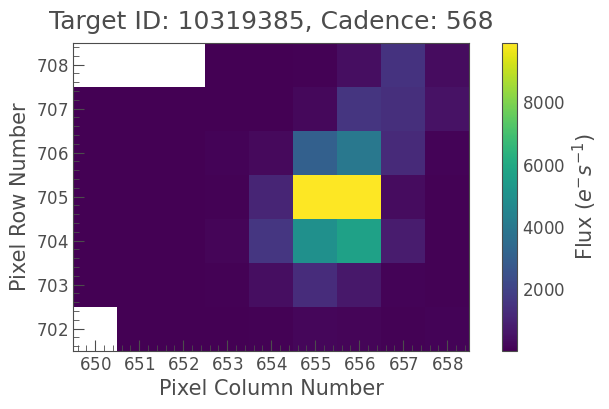

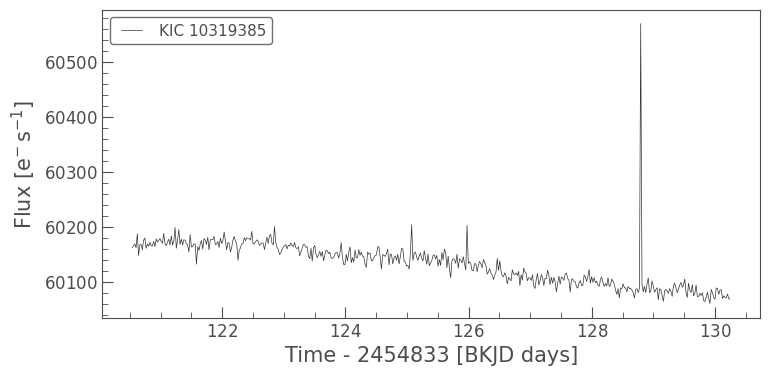

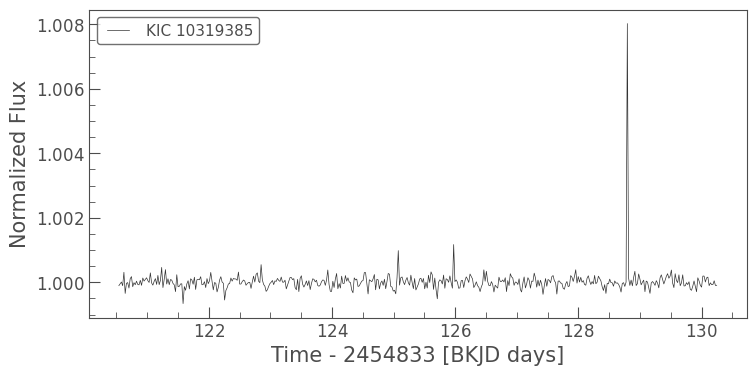

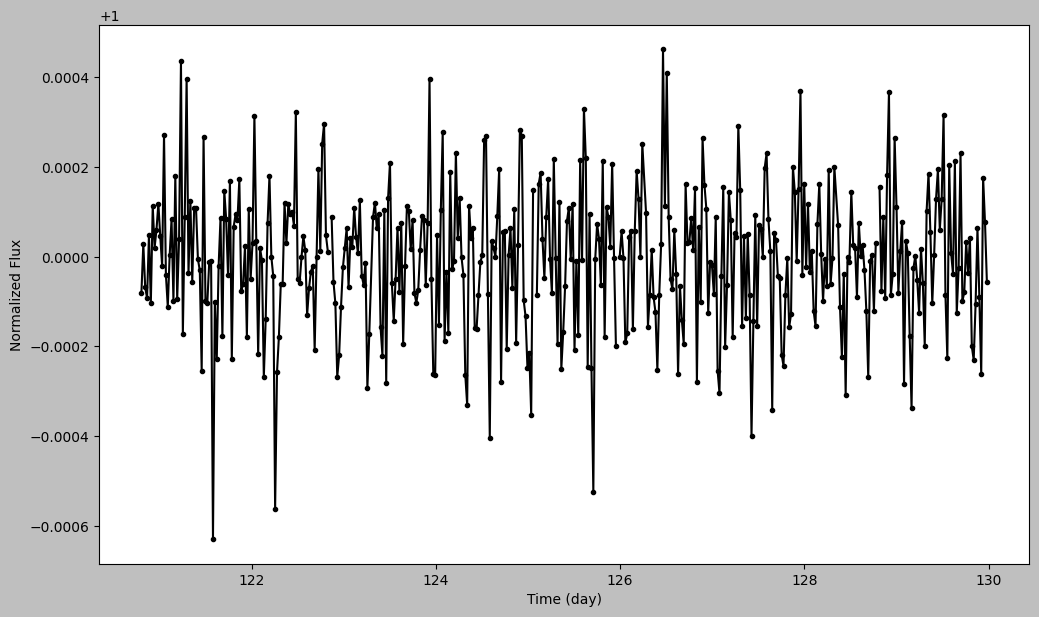

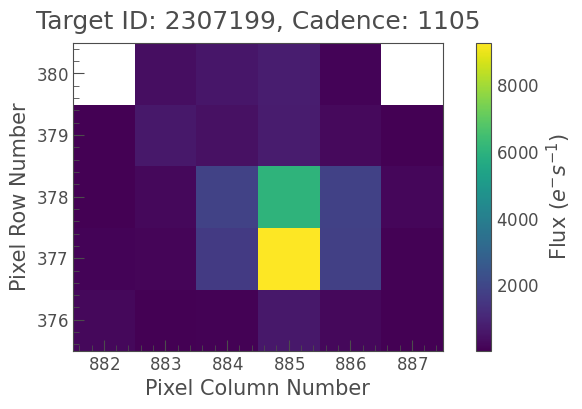

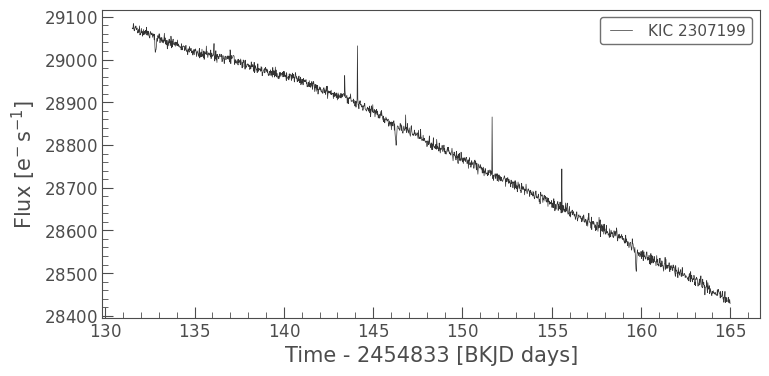

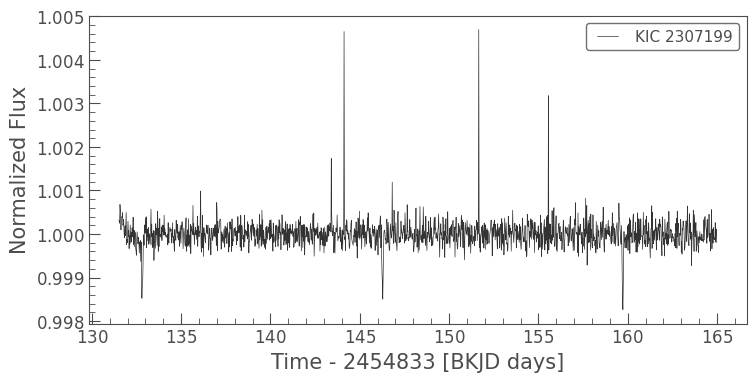

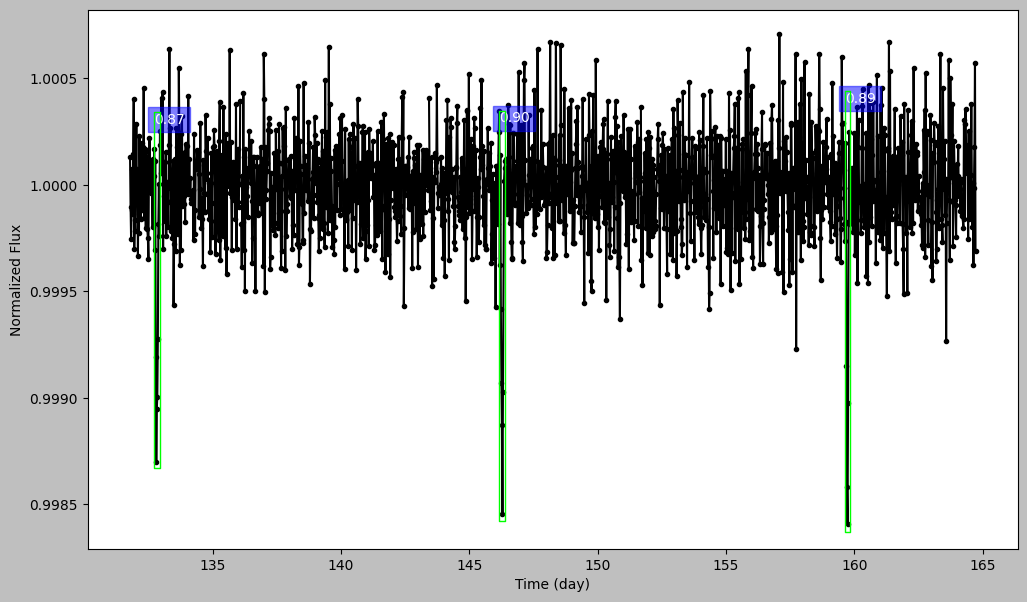

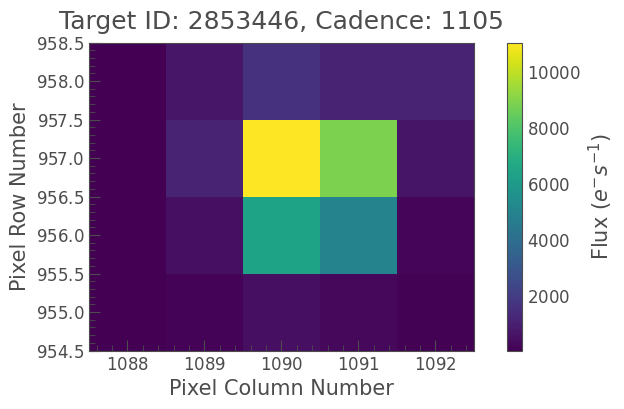

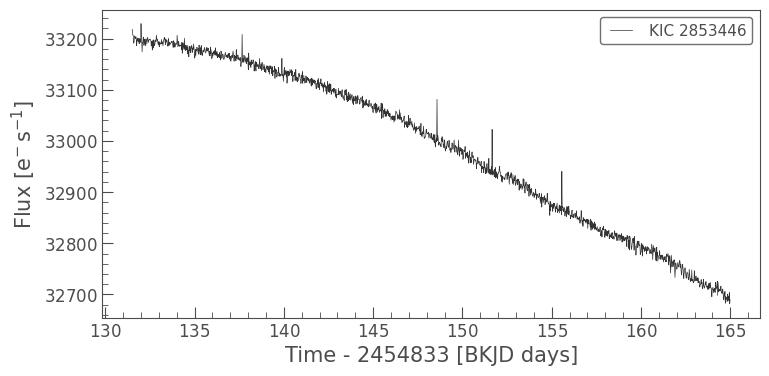

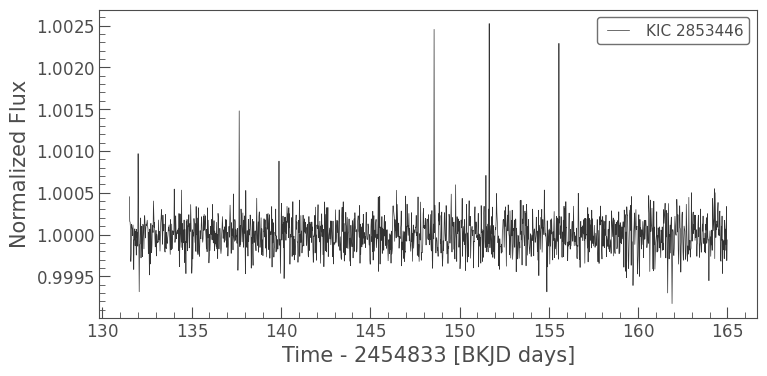

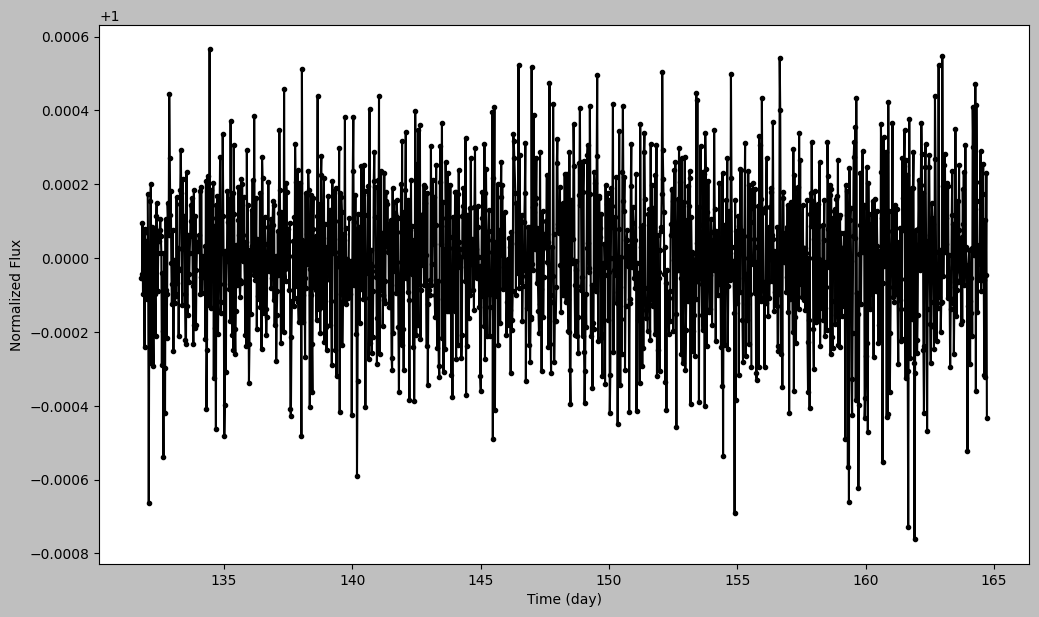

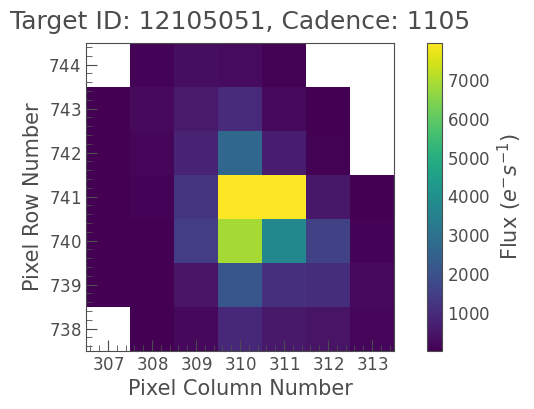

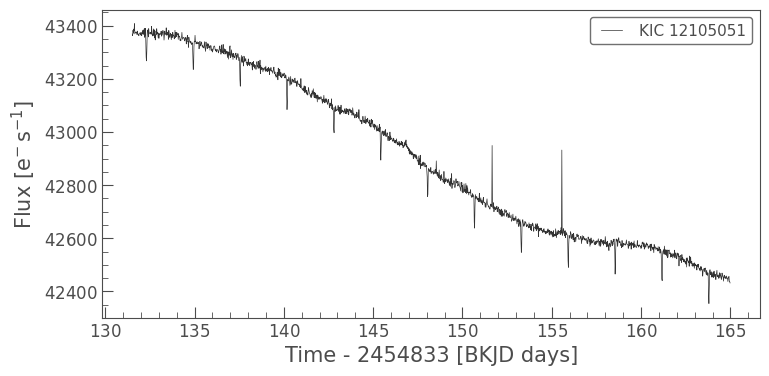

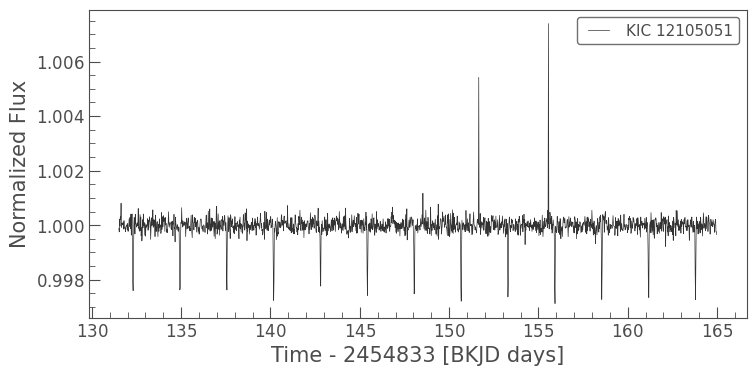

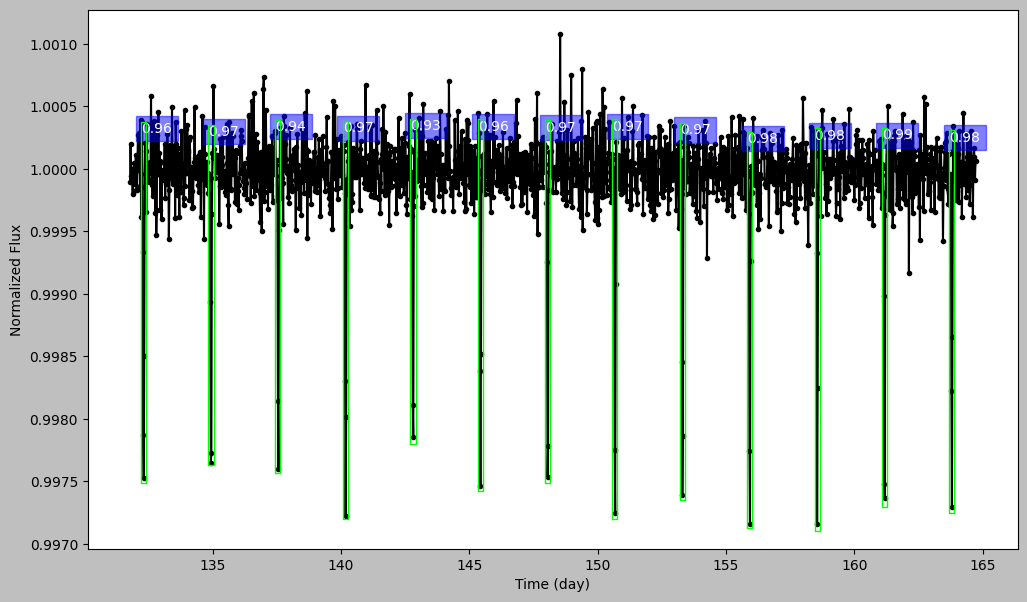

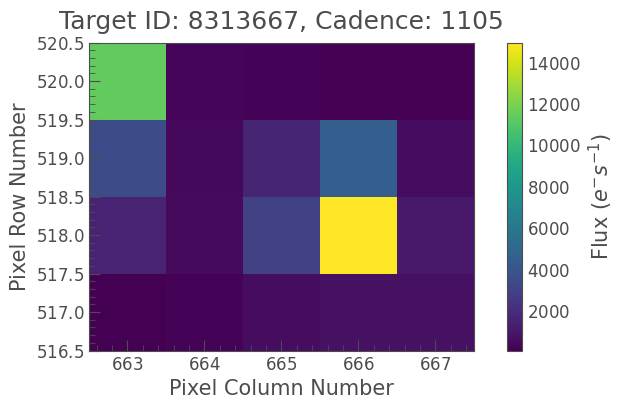

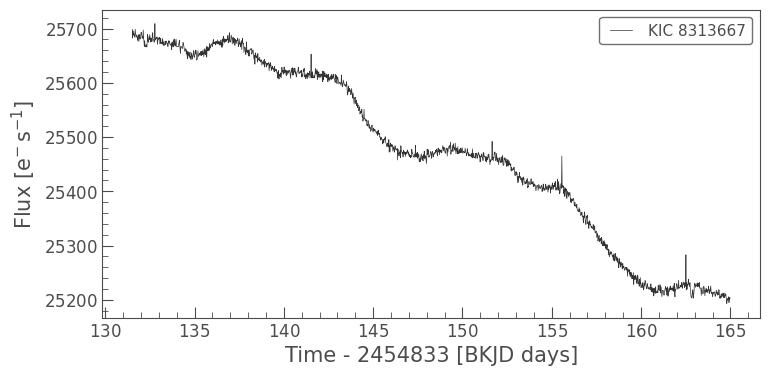

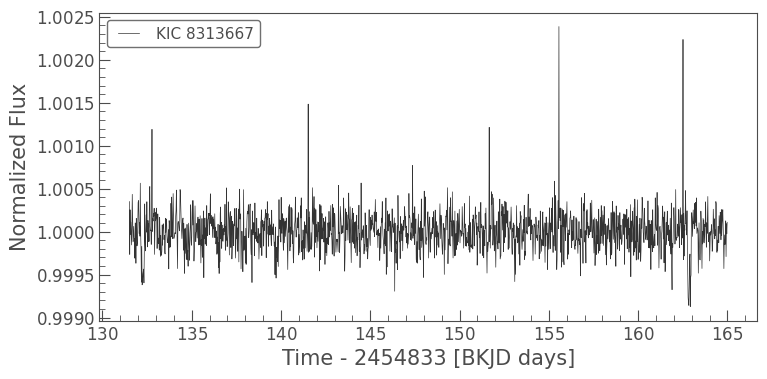

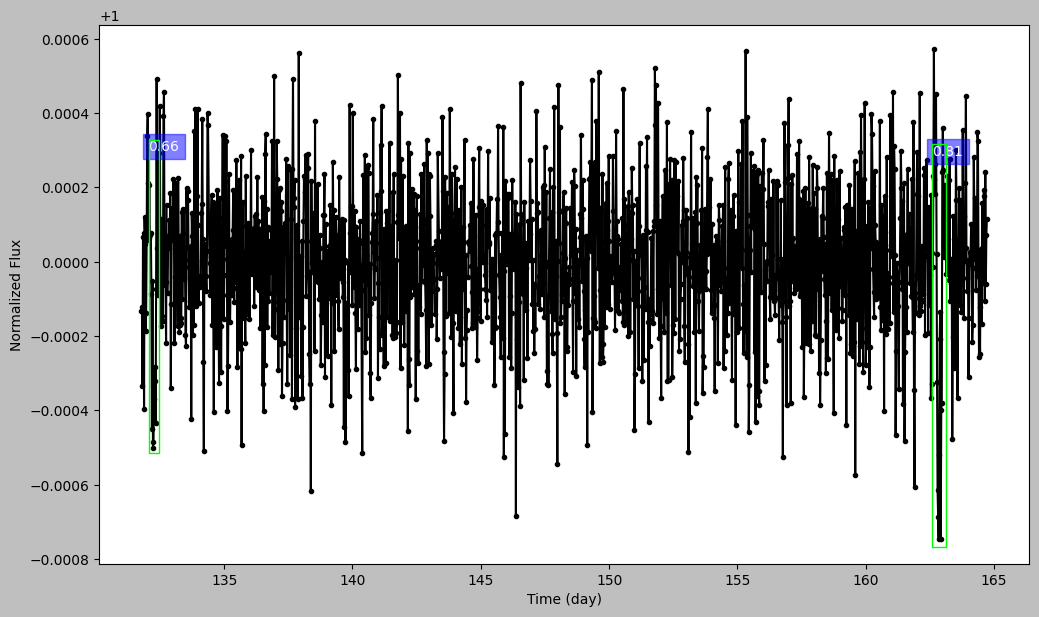

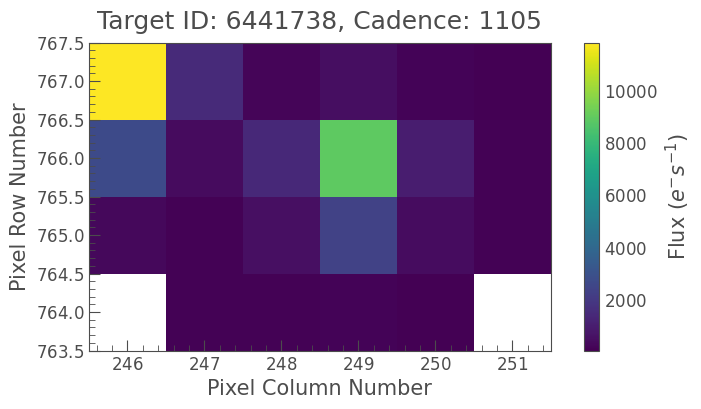

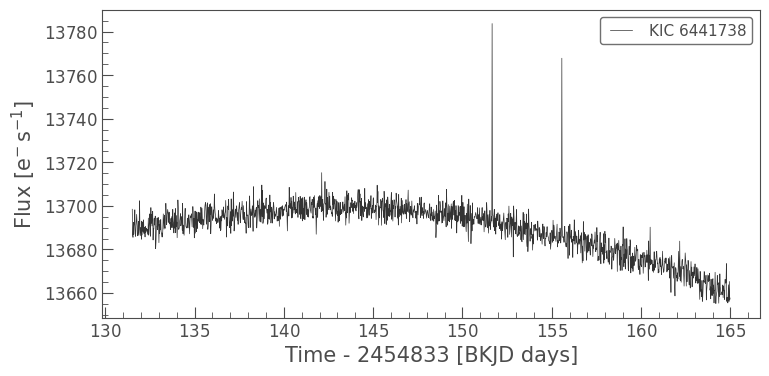

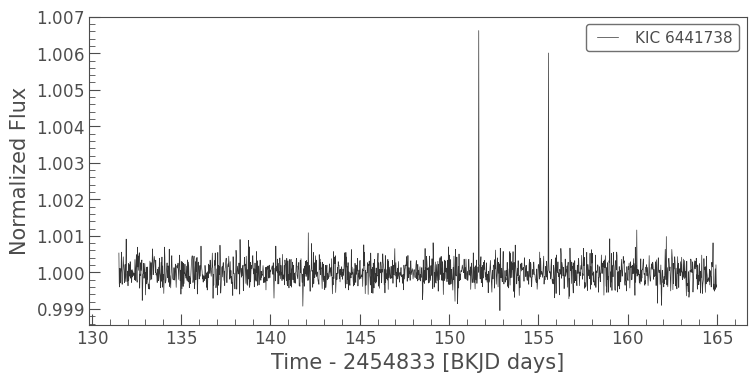

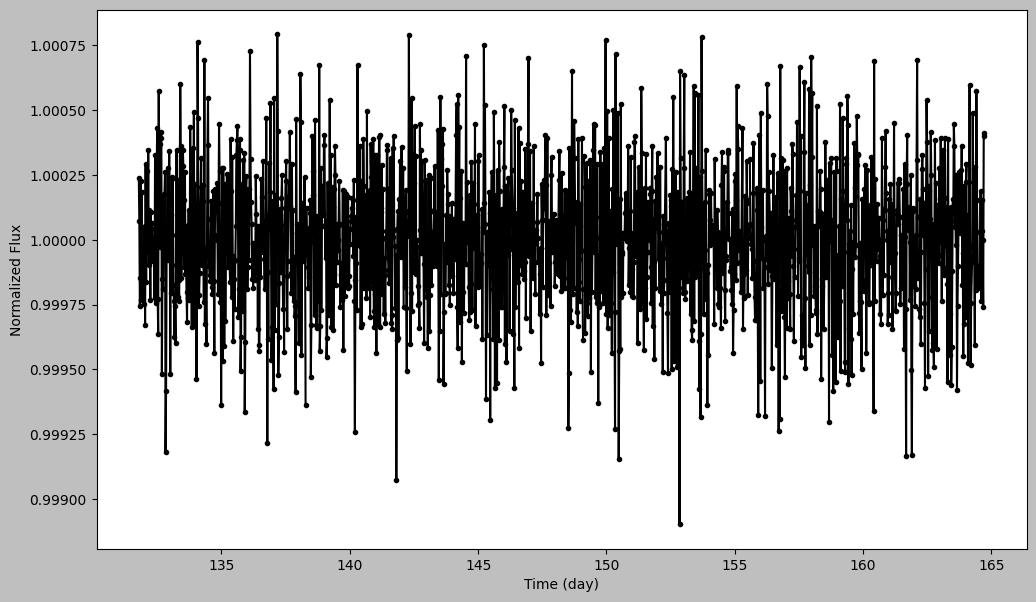

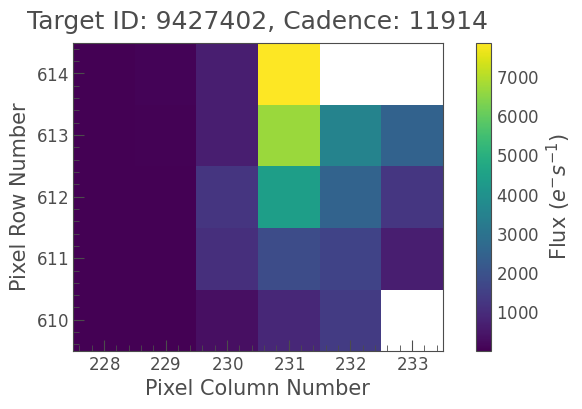

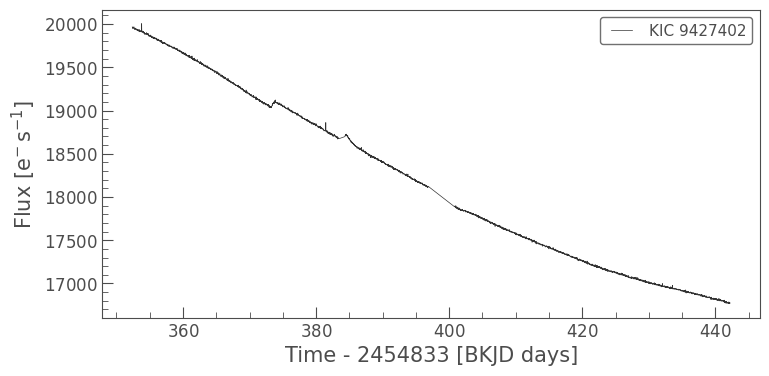

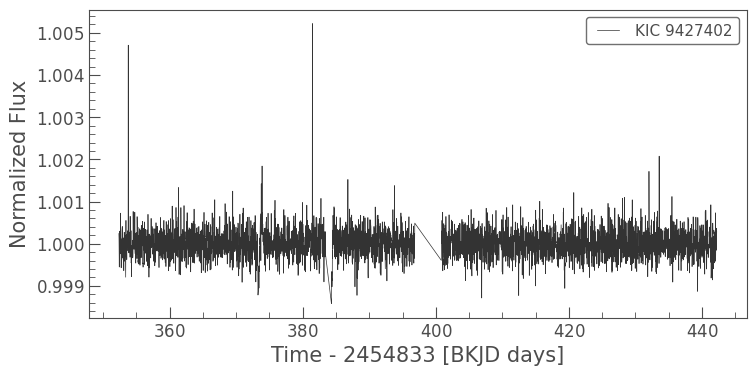

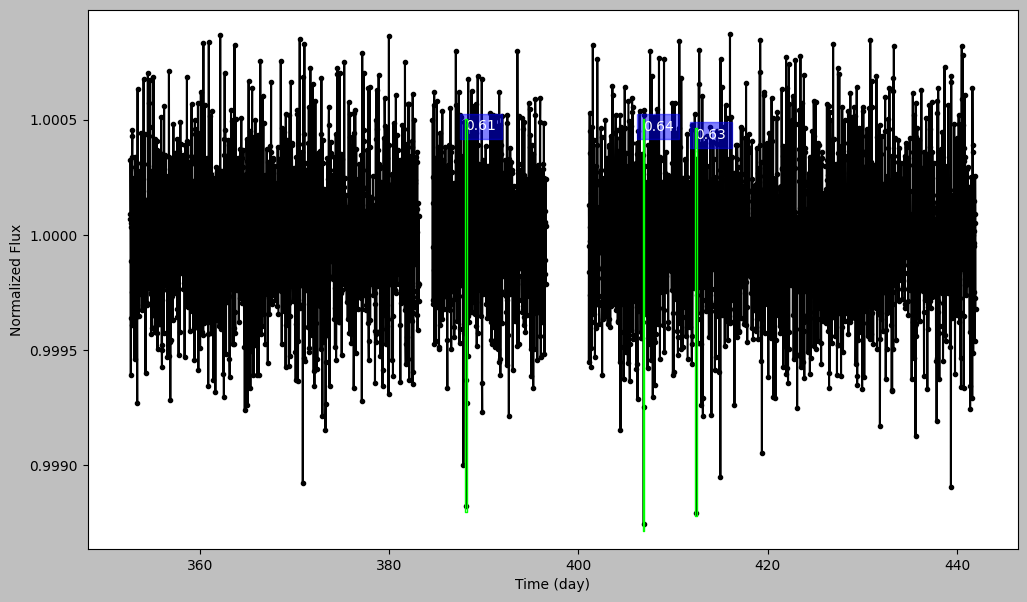

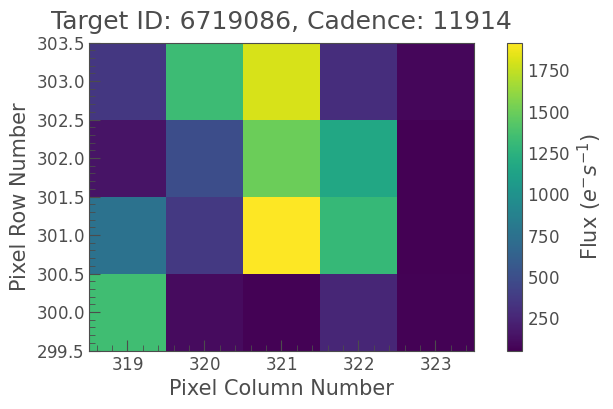

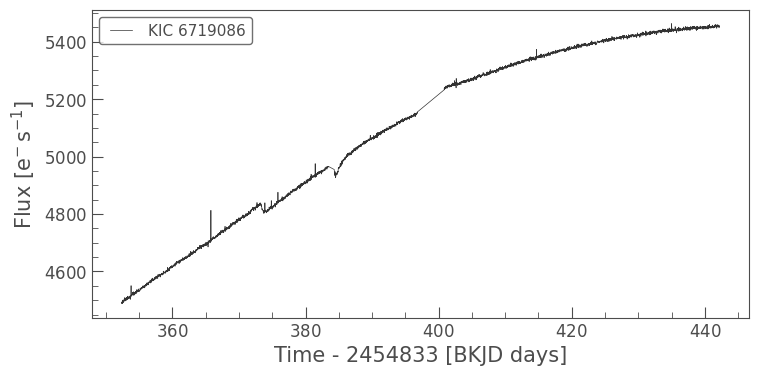

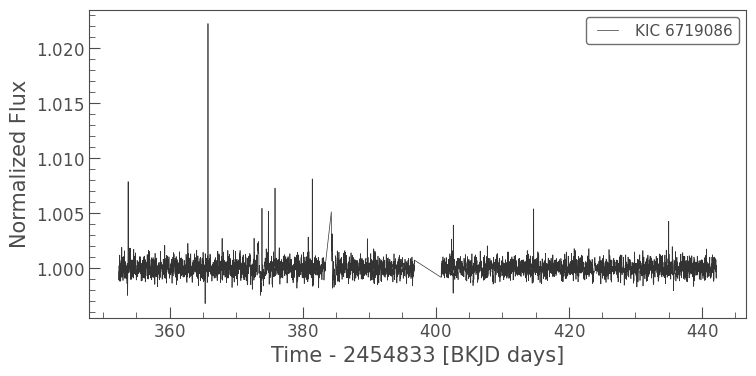

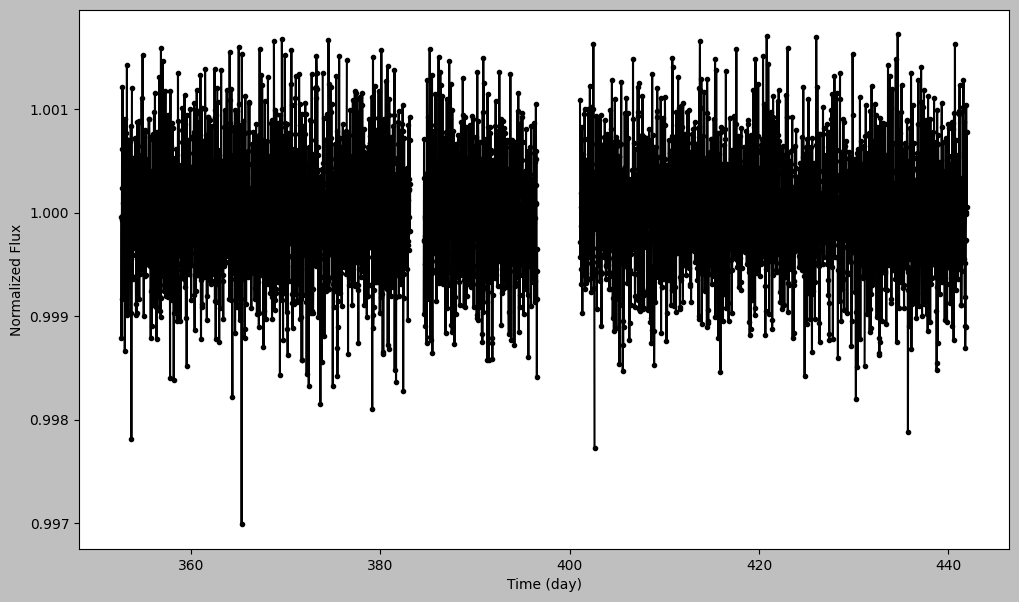

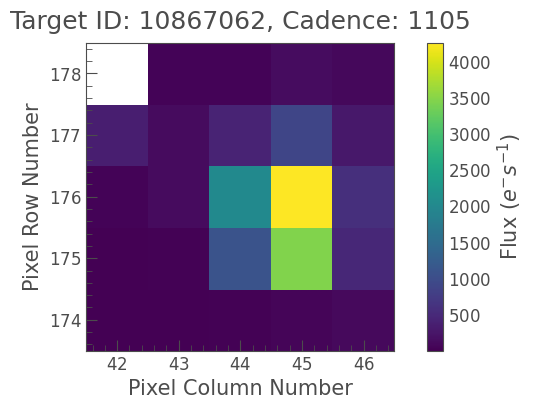

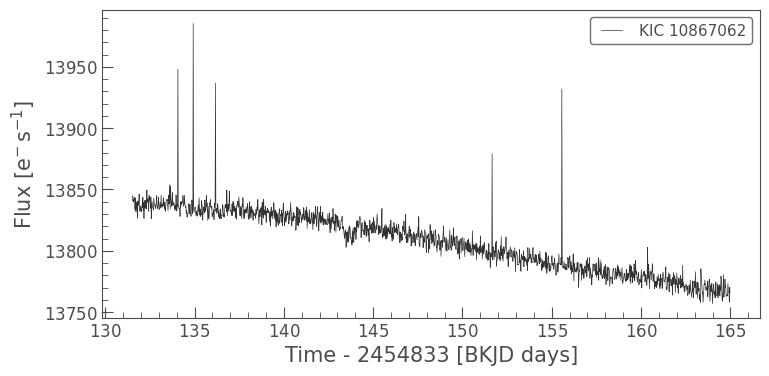

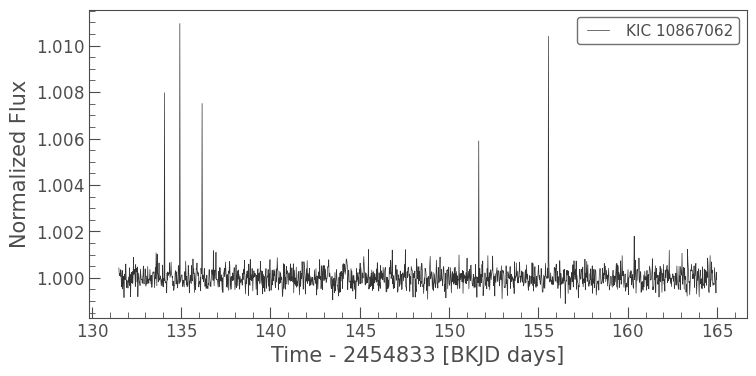

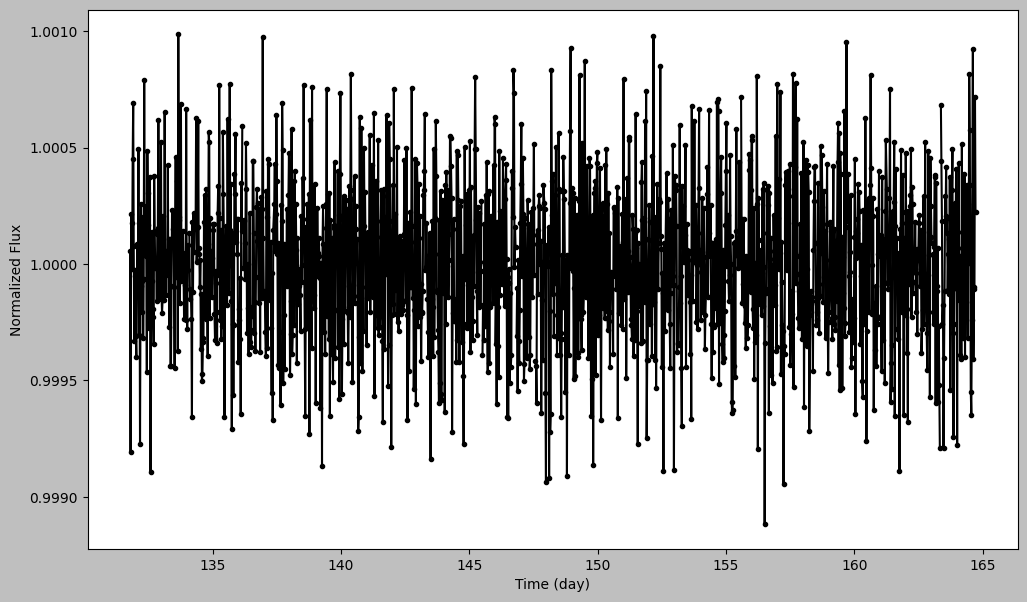

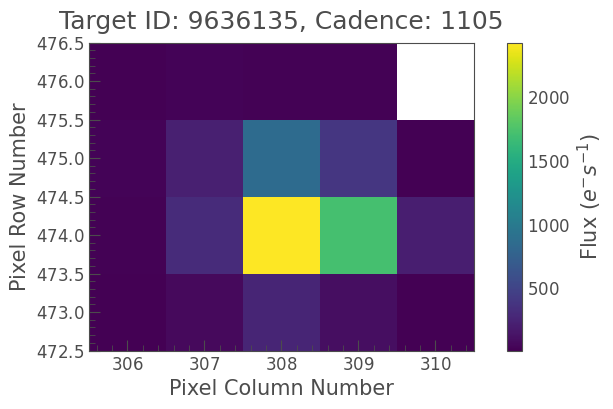

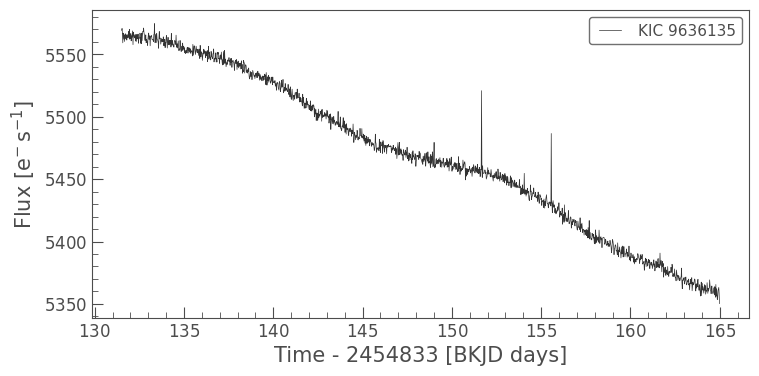

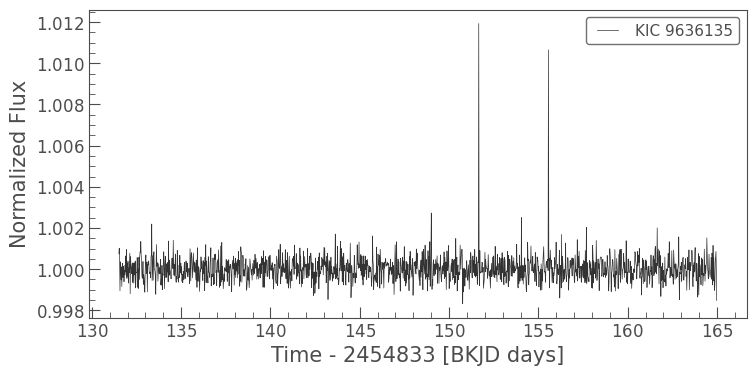

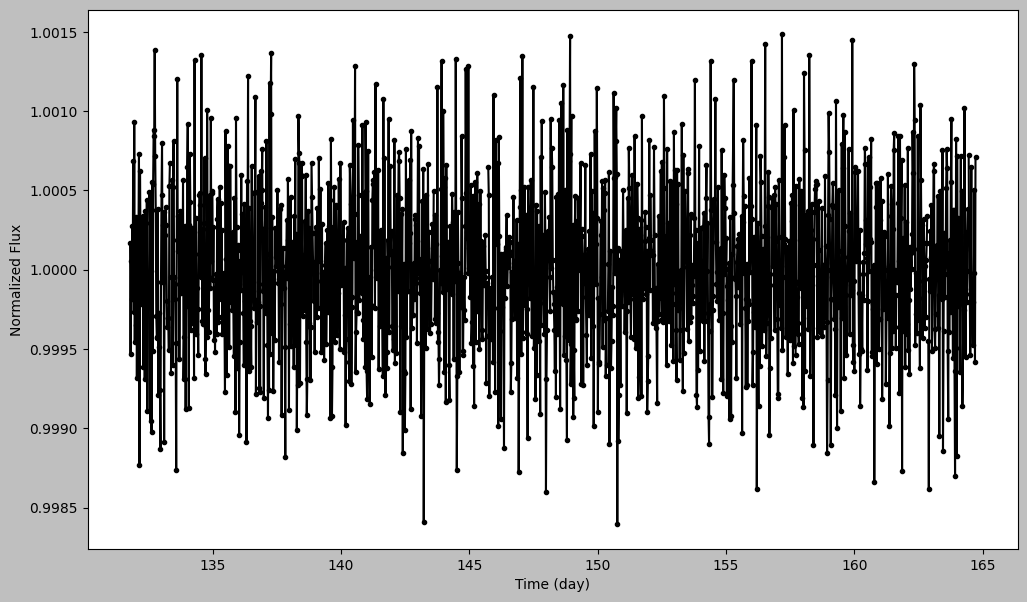

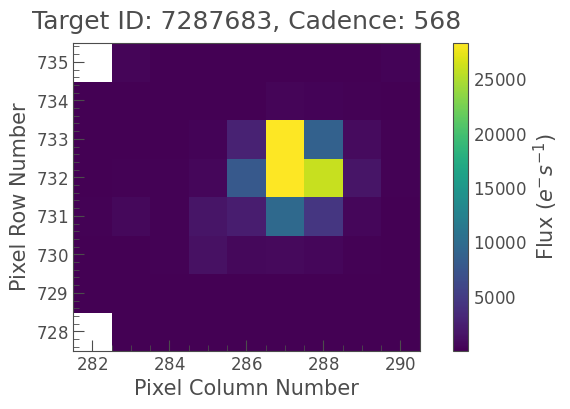

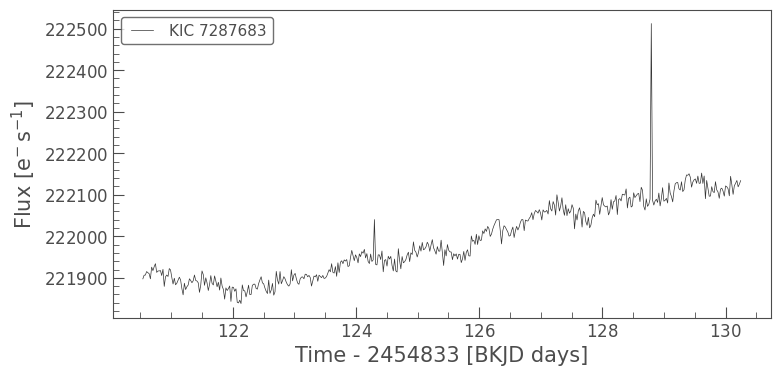

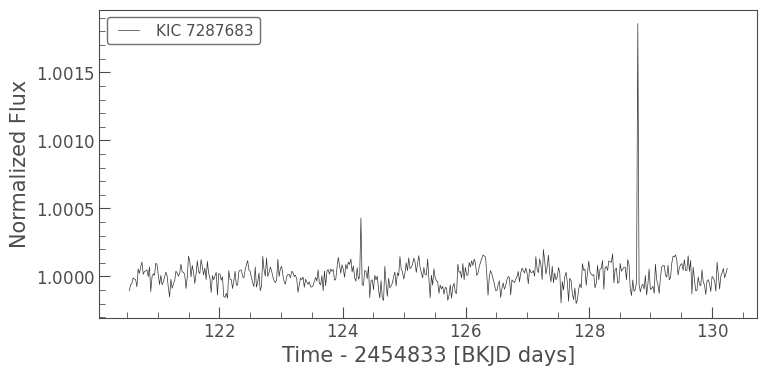

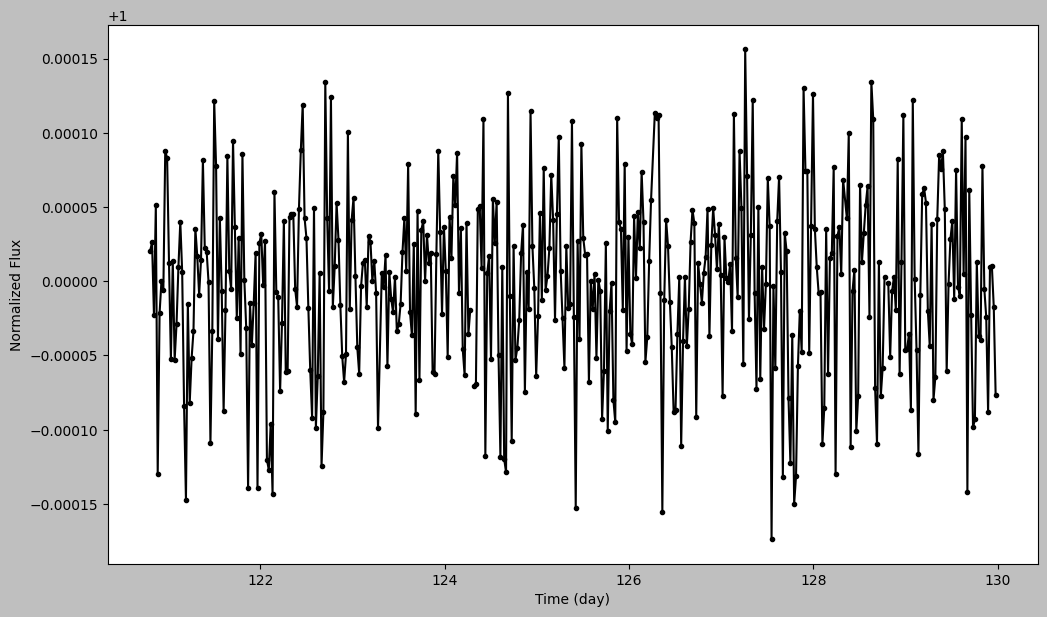

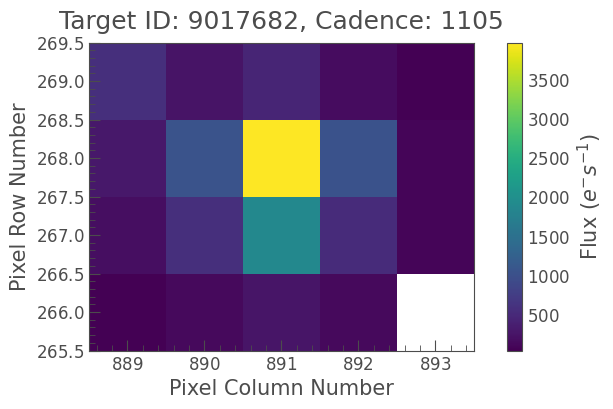

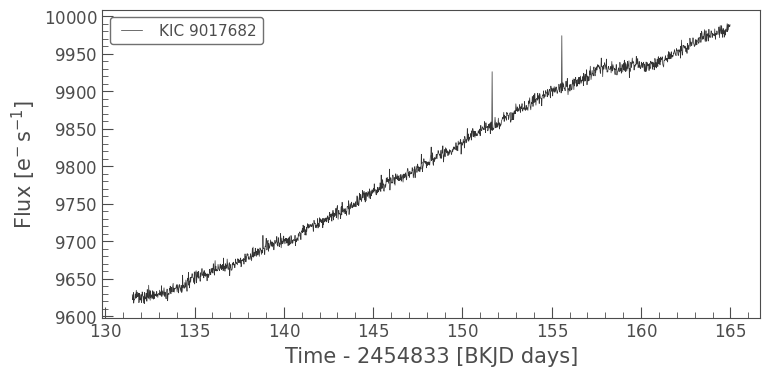

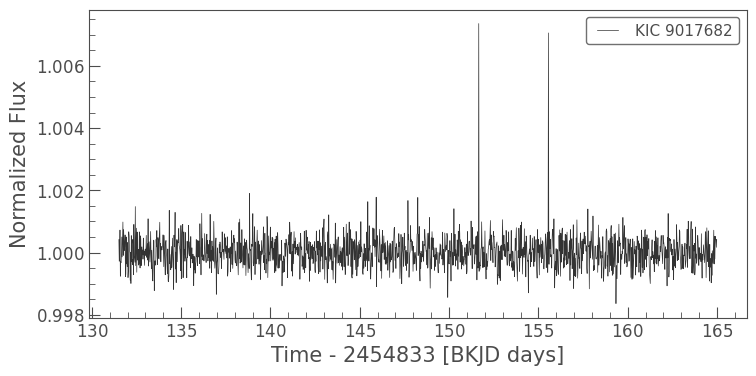

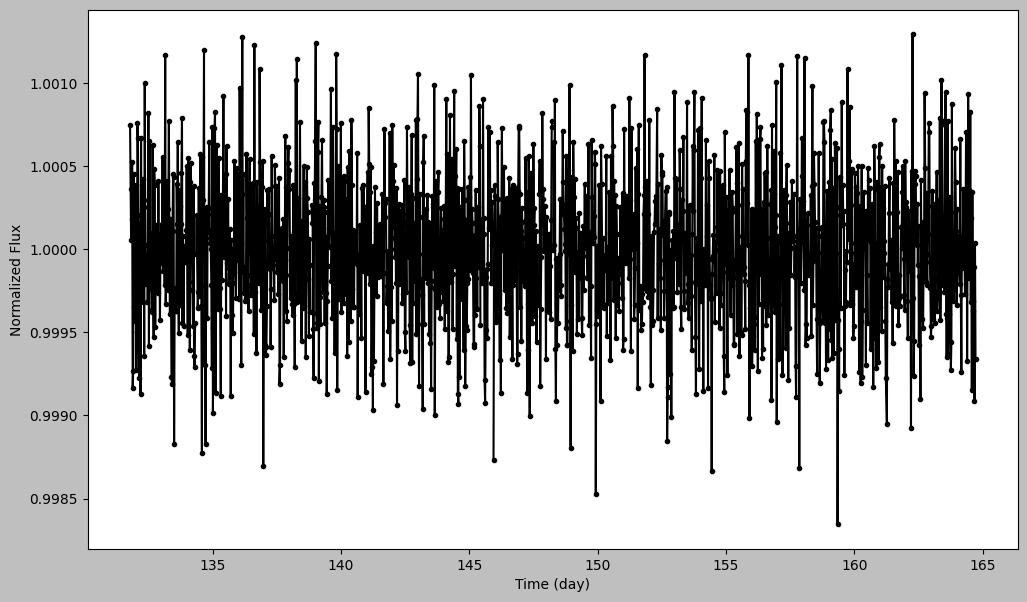

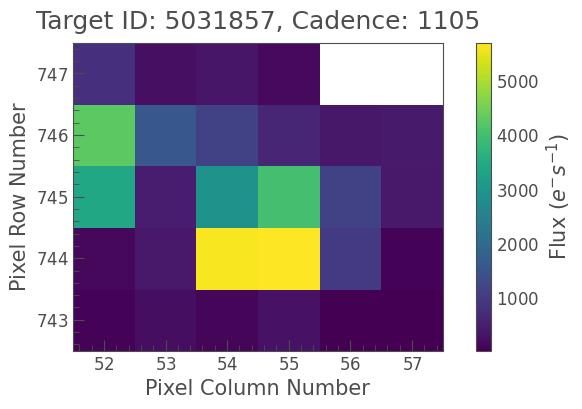

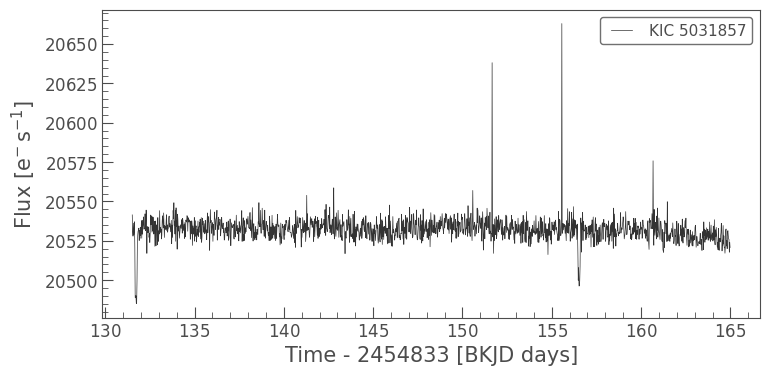

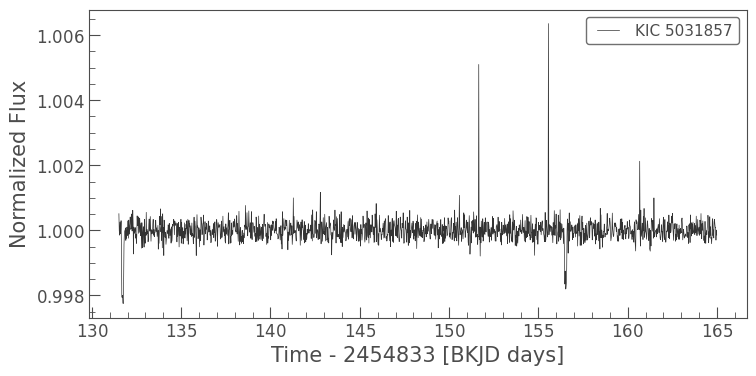

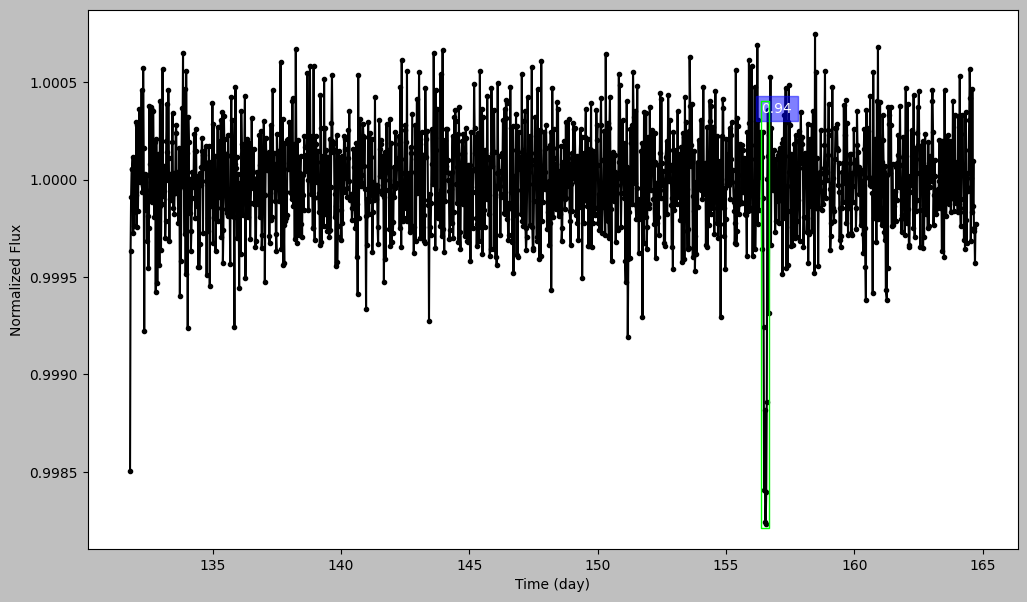

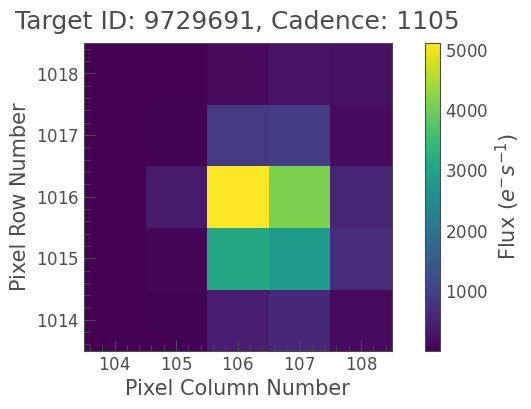

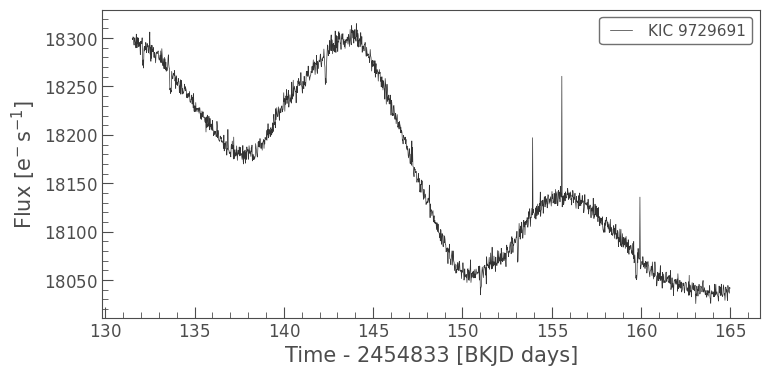

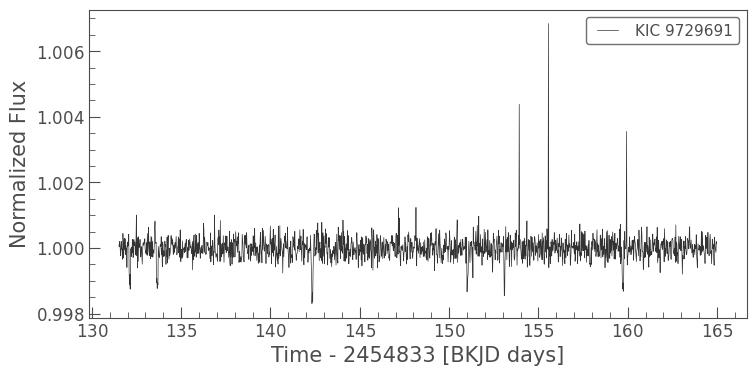

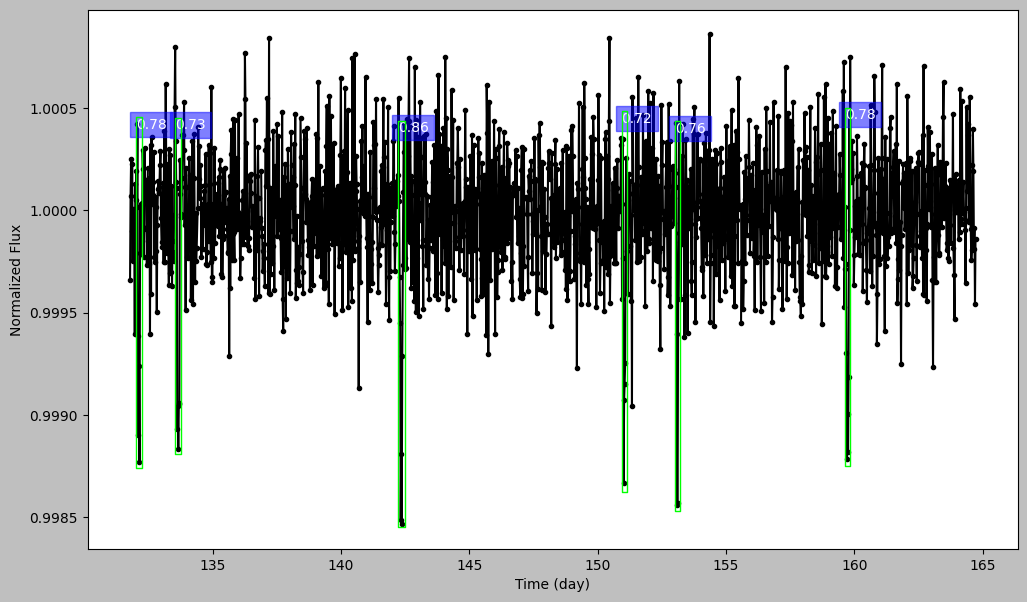

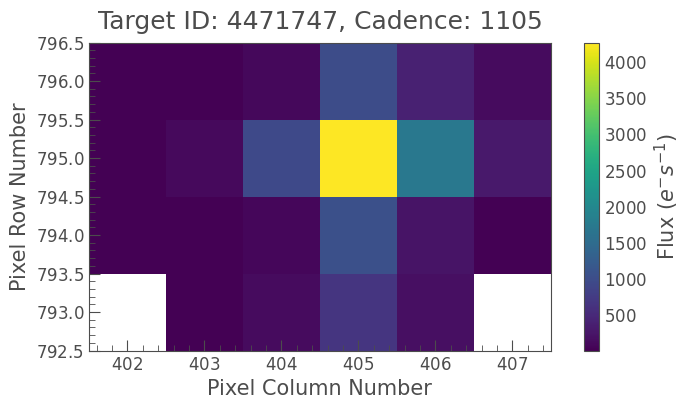

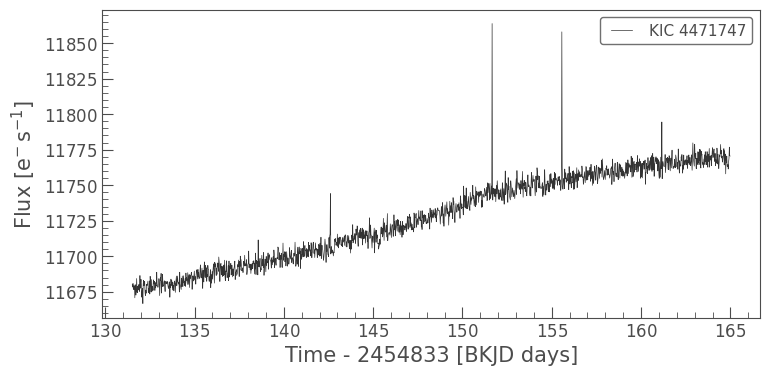

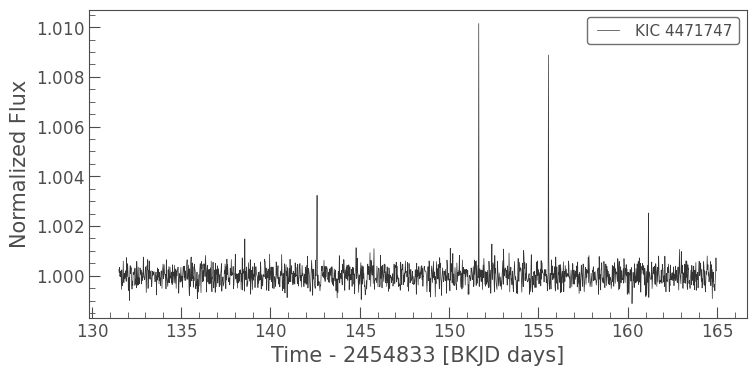

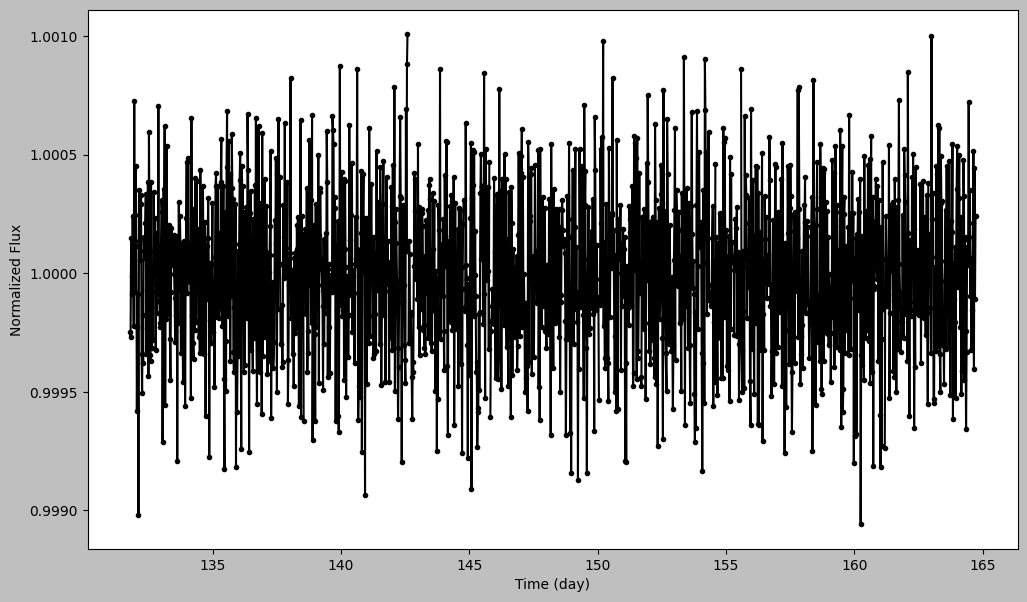

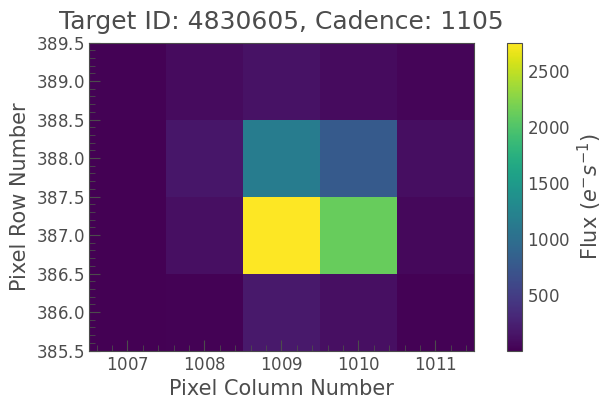

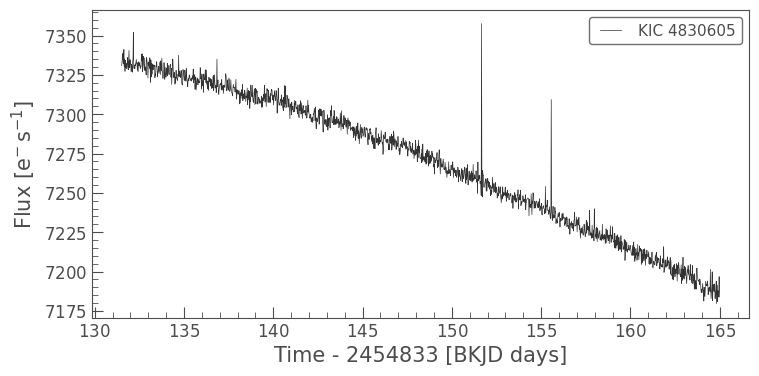

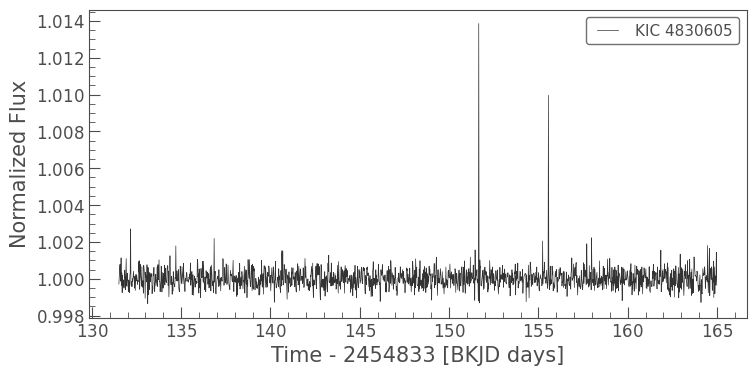

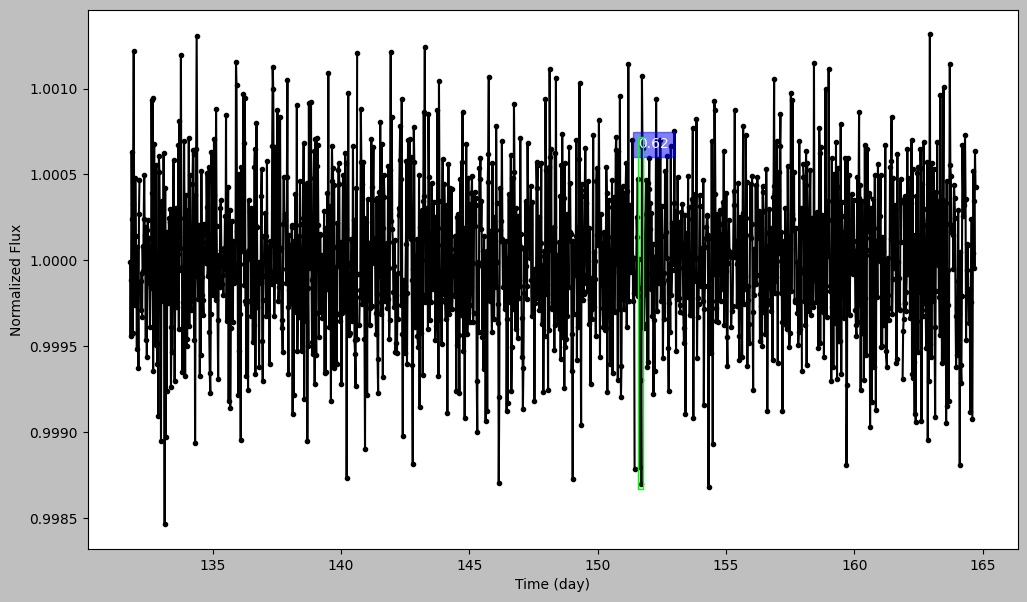

In [30]:
#deep_transit_candidates(candidatos_kic[0])
for i in candidatos_kic[:20]: #ejectua la funcion en cada candidato entregado por el machine learning
    deep_transit_candidates(i)

#finalmente se analiza manualmente cuales de estos candidatos son mejor evaluados por el deep learning